### TỔNG QUAN VỀ PHÂN CỤM K-MEANS

K-Means là một thuật toán machine learning không giám sát (unsupervised), dùng để phân nhóm các điểm dữ liệu dựa trên độ tương đồng (thường dựa trên khoảng cách).

Mục tiêu chính: Chia dữ liệu thành K cụm sao cho điểm trong cùng một cụm có đặc điểm giống nhau.

Nguyên lý hoạt động
Thuật toán K-Means lặp lại theo 4 bước chính:

- Bước 1: Chọn số cụm k.
    - Bạn cần chỉ định trước số lượng cụm cần phân loại.

- Bước 2️: Khởi tạo centroid
    - Chọn ngẫu nhiên k điểm dữ liệu ban đầu làm tâm cụm (centroid).

- Bước 3️: Phân cụm
    - Gán mỗi điểm dữ liệu vào cụm gần nhất (dựa theo khoảng cách Euclidean đến các centroid).

- Bước 4️: Cập nhật centroid
    - Tính toán lại centroid mới bằng trung bình các điểm trong mỗi cụm.

- Bước 5: Lặp lại bước 3 và 4 cho đến khi các cụm không thay đổi nữa (hội tụ), hoặc đạt số vòng lặp tối đa.



## Hàm Mục Tiêu


Hàm mục tiêu được biểu diễn như sau (viết bằng LaTeX):

$$
\underset{C}{\min} \sum_{k=1}^{K} \sum_{x_i \in C_k} \| x_i - \mu_k \|^2
$$


Với:

- $X = {x_1, x_2, ..., x_n}$ là tập dữ liệu gồm $n$ điểm.
- $k$ là số lượng cụm.
- $C_k$ là tập điểm thuộc cụm thứ $k$.
- $μ_k$ là trung tâm (centroid) của cụm $C_k$.

### CÁCH CHỌN K TỐI ƯU
- Silhouette Analysis:
    - Tính Silhouette score cho mỗi K.

    - K tối ưu là K cho score cao nhất.
​

---
##  Chuẩn bị và tiền xử lý dữ liệu

Trong bước này, chúng ta thực hiện các thao tác quan trọng để chuẩn bị dữ liệu đầu vào cho mô hình phân cụm.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

df = pd.read_csv('encode_data.csv')
# Ví dụ dữ liệu đã xử lý và chọn đặc trưng
X = df[["Price_segment", "Brand_encoded", "Engine Size", "Odometer", "Interior color_encoded", "Body Style_encoded", "Drive type_encoded"]]

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)


---
## Chọn số cụm tối ưu bằng Silhouette Score

Trong bước này, chúng ta thử nhiều giá trị khác nhau của `k` (số cụm) để tìm ra số cụm tối ưu cho thuật toán **KMeans** dựa trên chỉ số **Silhouette Score**.

Silhouette Score đo lường mức độ phù hợp của một điểm dữ liệu với cụm mà nó thuộc về so với các cụm khác. Giá trị càng gần 1 thì phân cụm càng tốt.



✅ Số cụm k tối ưu là: 2 với Silhouette Score = 0.3479


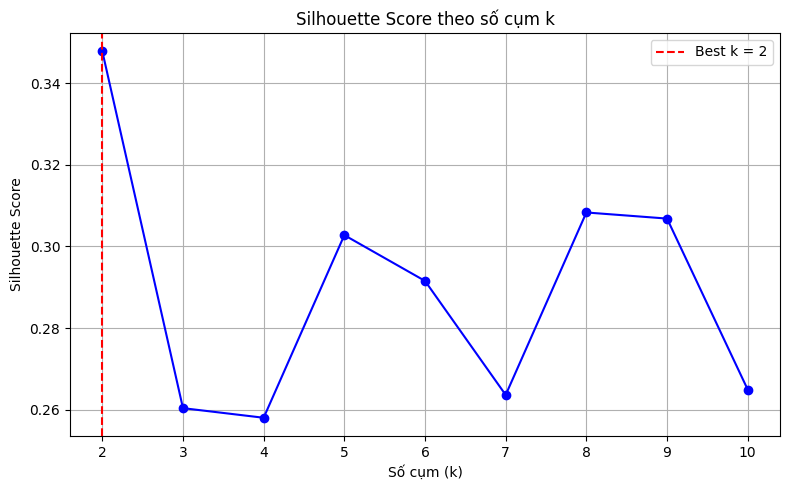

In [ ]:

k_values = range(2, 11)
scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)
    scores.append(silhouette_score(X_train_scaled, kmeans.labels_))

# Tìm k có silhouette score cao nhất
best_k = k_values[np.argmax(scores)]
best_score = max(scores)

print(f"\n✅ Số cụm k tối ưu là: {best_k} với Silhouette Score = {best_score:.4f}")

# Vẽ biểu đồ
plt.figure(figsize=(8, 5))
plt.plot(k_values, scores, marker='o', linestyle='-', color='b')
plt.title("Silhouette Score theo số cụm k")
plt.xlabel("Số cụm (k)")
plt.ylabel("Silhouette Score")
plt.xticks(k_values)
plt.grid(True)
plt.axvline(x=best_k, color='r', linestyle='--', label=f'Best k = {best_k}')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:

k = best_k  # số cụm đã xác định từ phương pháp Elbow hoặc Silhouette
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_train_scaled)


KMeans(n_clusters=2, random_state=42)

---
## Trực quan hóa kết quả phân cụm KMeans bằng PCA


###  Mục tiêu:
Do dữ liệu ban đầu có nhiều chiều (features), việc trực quan hóa là rất khó. Vì vậy, ta sử dụng **PCA (Principal Component Analysis)** để giảm chiều dữ liệu từ **n chiều → 2 chiều**, giúp dễ dàng biểu diễn trên biểu đồ.


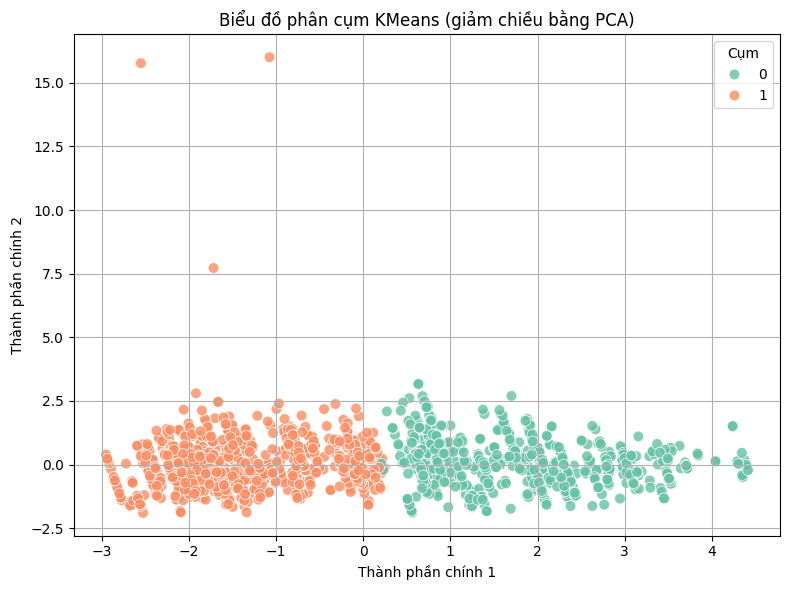

In [152]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Fit mô hình KMeans
labels = kmeans.fit_predict(X_train_scaled)  # X_scaled là dữ liệu đã chuẩn hóa

# Giảm chiều với PCA (từ nhiều chiều → 2 chiều)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# Vẽ biểu đồ cụm
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette="Set2", s=60, alpha=0.8
)
plt.title("Biểu đồ phân cụm KMeans (giảm chiều bằng PCA)")
plt.xlabel("Thành phần chính 1")
plt.ylabel("Thành phần chính 2")
plt.legend(title='Cụm')
plt.grid(True)
plt.tight_layout()
plt.show()


In [153]:
import matplotlib.pyplot as plt
import math

cluster_labels = kmeans.predict(X_train_scaled)

# Thêm cột 'cluster_label' vào DataFrame gốc
X['cluster_label'] = cluster_labels
X.to_csv('label1_data.csv', index=False)


C:\Users\a\AppData\Local\Temp\ipykernel_22336\2811463160.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster_label'] = cluster_labels


---
## Phân tích trung bình đặc trưng theo từng cụm

Sau khi thực hiện phân cụm dữ liệu và lưu nhãn cụm vào cột `cluster_label`, bước tiếp theo là trực quan hóa **giá trị trung bình của từng đặc trưng số theo từng cụm** để hiểu rõ hơn các cụm khác nhau như thế nào.



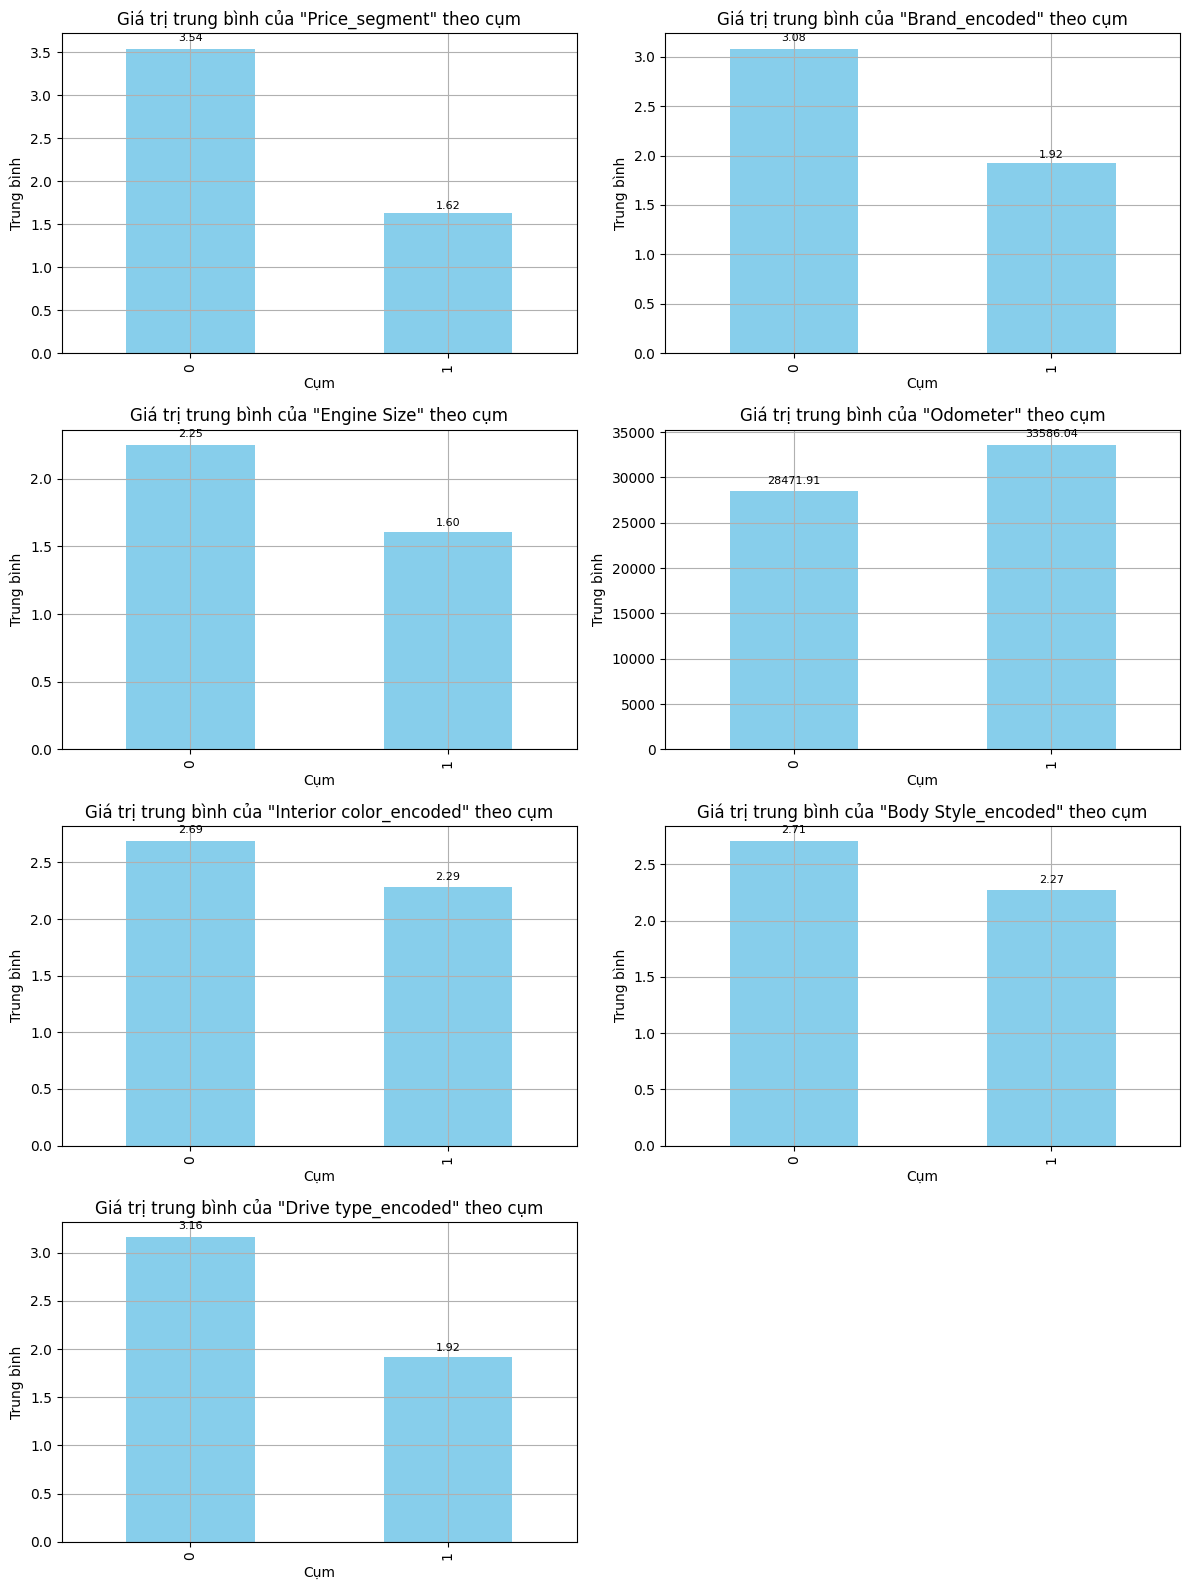

In [154]:

# Giả sử bạn có: df chứa dữ liệu gốc + 'cluster_label' (nhãn cụm)
features = X.select_dtypes(include=['number']).columns.drop('cluster_label')
means = X.groupby('cluster_label')[features].mean()
# Số cột và hàng trong subplot
n_cols = 2
n_rows = math.ceil(len(features) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 4))
axes = axes.flatten()

# Vẽ biểu đồ từng đặc trưng
for i, feature in enumerate(features):
    bars = means[feature].plot(kind='bar', ax=axes[i], color='skyblue')
    axes[i].set_title(f'Giá trị trung bình của "{feature}" theo cụm')
    axes[i].set_xlabel('Cụm')
    axes[i].set_ylabel('Trung bình')
    axes[i].grid(True)

    # Thêm giá trị lên cột
    for idx, value in enumerate(means[feature]):
        axes[i].text(idx, value + 0.02 * value, f'{value:.2f}', ha='center', va='bottom', fontsize=8)

# Ẩn subplot thừa nếu có
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Phân tích dữ liệu phân cụm bằng KMeans

## Thông tin chung

- Sử dụng thuật toán **KMeans** với `k = 2` để phân cụm dữ liệu.
- Mỗi cụm đại diện cho một nhóm xe có đặc điểm tương đồng theo các tiêu chí: giá, hãng, dung tích động cơ, số km đã đi, màu nội thất, kiểu dáng xe, và loại truyền động.

---

## Phân tích chi tiết các cụm

| Thuộc tính                     | Cụm 0 (Mean) | Cụm 1 (Mean) | Nhận xét |
|-------------------------------|--------------|--------------|----------|
| `Price_segment`               | **3.51**     | **1.62**     | Xe trong cụm 0 thuộc phân khúc giá cao hơn. |
| `Brand_encoded`               | 3.08         | 1.92         | Cụm 0 có xu hướng sử dụng thương hiệu "cao cấp" hơn. |
| `Engine Size`                 | 2.25         | 1.60         | Xe cụm 0 có động cơ lớn hơn. |
| `Odometer`                    | 28,471       | 33,950       | Xe cụm 1 đã chạy nhiều hơn - có thể là xe cũ hơn. |
| `Interior color_encoded`      | 2.59         | 2.29         | Cụm 0 có xu hướng sử dụng nội thất màu sang hơn. |
| `Body Style_encoded`          | 2.71         | 2.27         | Cụm 0 có kiểu dáng đa dạng hoặc cao cấp hơn. |
| `Drive type_encoded`          | 3.16         | 1.92         | Cụm 0 sử dụng hệ dẫn động cao cấp (ví dụ: AWD, 4WD) nhiều hơn. |

---

## Kết luận

- **Cụm 0** đại diện cho nhóm xe:
  - Phân khúc giá cao
  - Thương hiệu cao cấp
  - Động cơ lớn
  - Số km đi thấp hơn
  - Có thể là xe mới hơn hoặc sang trọng hơn

- **Cụm 1** đại diện cho nhóm xe:
  - Giá rẻ hơn
  - Động cơ nhỏ, đi nhiều
  - Thường là xe phổ thông, có thể đã qua sử dụng nhiều


---


## So sánh biểu đồ phân cụm giữa KMeans và GMM

| Mô hình | Nhận xét |
|--------|----------|
| **KMeans** | - Phân cụm khá rõ ràng theo thành phần chính 1.<br>- Các điểm dữ liệu tập trung, ranh giới phân cụm tương đối tuyến tính. |
| **GMM**    | - Ranh giới phân cụm linh hoạt hơn, có sự chồng lấn giữa các cụm.<br>- GMM thể hiện khả năng phân cụm mềm tốt hơn, phù hợp với dữ liệu có phân bố không tuyến tính. |


# Phân tích & So sánh

### Điểm giống nhau
- **Cả hai mô hình** đều phát hiện được hai nhóm rõ ràng:
  - **Cụm 0**: Xe có phân khúc giá cao, thương hiệu cao cấp, động cơ lớn, nội thất và hệ dẫn động hiện đại.
  - **Cụm 1**: Xe bình dân, đã qua sử dụng nhiều (Odometer cao), động cơ nhỏ hơn.

### Sự khác biệt chính

| Tiêu chí                     | Nhận xét                                                                 |
|-----------------------------|--------------------------------------------------------------------------|
| **Mức phân biệt phân khúc** | GMM thể hiện sự chênh lệch cao hơn về `Price_segment` và `Brand_encoded`. |
| **Odometer**                | GMM cho thấy sự chênh lệch rõ hơn về số km đã chạy (Cụm 1 chạy nhiều hơn). |
| **Drive type**              | GMM phân biệt hệ dẫn động rõ hơn giữa cụm cao cấp và bình dân.           |
| **Độ phân giải mô hình**    | GMM có vẻ nhạy hơn trong việc phân biệt chi tiết hơn giữa các cụm.      |

---

## 3. Kết luận

| Mô hình   | Ưu điểm | Nhược điểm | Phù hợp với... |
|-----------|---------|-------------|----------------|
| **KMeans** | Nhanh, dễ hiểu, phân cụm rõ ràng | Kém hiệu quả với dữ liệu phân bố không đồng đều | Tập dữ liệu đơn giản, cụm có dạng cầu |
| **GMM**    | Phân cụm mềm, phản ánh tốt sự phân bố thực tế | Chậm hơn, cần nhiều tính toán hơn | Dữ liệu có cụm chéo nhau, không đồng nhất |

### Kết luận:
- **GMM** thể hiện **khả năng phân cụm mềm, chính xác hơn** cho dữ liệu có phân bố chồng lấn hoặc không tuyến tính.
- Nếu muốn mô hình đơn giản, nhanh và hiệu quả trên dữ liệu tách biệt, **KMeans** vẫn là lựa chọn đáng tin cậy.